<h1>Simulating the action potential with random walk of ions</h1>

<h3>GroupXX: Us :p</h3>

<h2>Abstract</h2>

<h2>1 - Theory</h2>

**Teori**

<h2>2 - Excercises</h2>

**Excercises**

<h2>3 - Programming</h2>


## 2 - The diffusion equation

**2.1**
Show that the function

$$ 
\tilde{\phi}(x,t) = \frac{1}{\sqrt{4 \pi Dt}} e^{-\frac{(x-\mu)^2}{4Dt}},
$$

where $D$ is a constant, is a solution of the diffusion equation

$$
\frac{\partial \phi (x,t)}{\partial t} = D \frac{\partial^2 \phi (x,t)}{\partial x^2}.
$$

The left side of the equation is solved by differentiating with respect to $t$.

$$
\frac{\partial}{\partial t} \frac{1}{\sqrt{4 \pi Dt}} e^{-\frac{(x-\mu)^2}{4Dt}} 
= 
\left( \frac{1}{\sqrt{4 \pi Dt}} \right)' e^{-\frac{(x-\mu)^2}{4Dt}} 
+ 
\frac{1}{\sqrt{4 \pi Dt}} \left(e^{-\frac{(x-\mu)^2}{4Dt}}\right)' 
=
- \frac{1}{4\sqrt{D\pi}t^{3/2}}e^{-\frac{(x-\mu)^2}{4Dt}} 
+
\frac{(x-\mu)^2}{(4D)^{3/2}\sqrt{\pi}t^{5/2}}e^{-\frac{(x-\mu)^2}{4Dt}}
=
\frac{1}{4\sqrt{D\pi}t^{3/2}} e^{-\frac{(x-\mu)^2}{4Dt}}
\left(\frac{(x-\mu)^2}{\sqrt{4}t}-1\right)
$$

The right side is then solved by differentiating twice with respect to $x$, times the constant $D$.

$$
\frac{\partial}{\partial x} \frac{1}{\sqrt{4 \pi Dt}} e^{-\frac{(x-\mu)^2}{4Dt}} = - \frac{2(x-\mu)}{(4Dt)^{3/2}\sqrt{\pi}}e^{-\frac{(x-\mu)^2}{4Dt}}
$$
<br>
$$
-\frac{\partial}{\partial x} \frac{2(x-\mu)}{(4Dt)^{3/2}\sqrt{\pi}} e^{-\frac{(x-\mu)^2}{4Dt}}
= \frac{2(x-\mu)}{(4Dt)^{3/2}\sqrt{\pi}} \left( e^{-\frac{(x-\mu)^2}{4Dt} \right)' 
- \left( \frac{2(x-\mu)}{(4Dt)^{3/2}\sqrt{\pi}}\right)' e^{-\frac{(x-\mu)^2}{4Dt}}
$$

(5.0, 16.135674761223964)


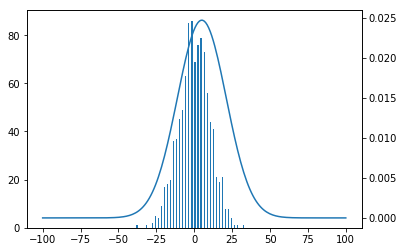

In [2]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy.stats import norm

N = 1000
steps = 100 
field = 2*steps
x_vec = np.linspace(-steps, steps, field)

particles = np.zeros([N, field])
particles.T[steps] = np.ones(N)

for i in range(steps):
    steps_vec = np.around(np.random.rand(N))
    steps_vec[steps_vec == 0] = -1
    for j in range(N):
        particles[j] = np.roll(particles[j], int(steps_vec[j]))

dist = np.sum(particles, 0)
params = norm.fit(dist)
print(params)
fitted_pdf = norm.pdf(x_vec, loc = params[0], scale = params[1])

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(x_vec, dist)
ax2.plot(x_vec, fitted_pdf)

plt.show()